# Modelling gender pay gap data

Aim is to get insights from different models and compare. This would help direct future data collection, too.

Getting insights is probably more important than predictions for this dataset since it is unclear what may be the cause of gender pay gap.

### Some assumptions: 

- From data exploration and through gender pay gap reports we see the difference in number of women and men in upper quartile and lower quartile to be a potential factor. 
- We believe the company size could also play a role because ...
- Gender pay gap can be more obvious in some industries than others

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'data/gender-pay-gap-uk-gov/2018.csv.gz'
data = pd.read_csv(url, compression='gzip')
data.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nD...",00226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,55.1,53.3,46.7,https://www.bryanston.co.uk/employment,Michael McGovern (Chief Operating Officer),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2019 00:00:00,03/04/2019 13:43:34
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,88.4,20.3,79.7,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00:00,01/04/2019 12:37:21
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam,\r\nGround Floo...",03951948,61900,7.7,12.7,11.3,10.9,67.0,52.0,...,50.0,56.0,44.0,NaN,Michael Graham (CEO),1000 to 4999,118 LIMITED,False,05/04/2019 00:00:00,06/03/2019 13:26:24
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",10530651,78300,30.0,29.0,-10.0,69.0,46.0,74.0,...,83.0,25.0,75.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,False,05/04/2019 00:00:00,03/04/2019 15:43:17
4,1509 GROUP,"Royal Grammar School,\r\nHigh Street,\r\nGuild...",04104101,"85200,\r\n85310",13.4,12.7,0.0,0.0,0.0,0.0,...,51.6,61.3,38.7,https://www.rgs-guildford.co.uk,Kate Perceval (Bursar),250 to 499,1509 GROUP,False,05/04/2019 00:00:00,18/03/2019 14:03:16


In [3]:
data.shape

(10817, 25)

In [4]:
#Columns that have a single value for all rows do not contain any information for modeling.

print(data.nunique())

EmployerName                 10817
Address                       9313
CompanyNumber                 9478
SicCodes                      2004
DiffMeanHourlyPercent          851
DiffMedianHourlyPercent        891
DiffMeanBonusPercent          1712
DiffMedianBonusPercent        1761
MaleBonusPercent               978
FemaleBonusPercent             974
MaleLowerQuartile              977
FemaleLowerQuartile            977
MaleLowerMiddleQuartile        982
FemaleLowerMiddleQuartile      982
MaleUpperMiddleQuartile        976
FemaleUpperMiddleQuartile      976
MaleTopQuartile                946
FemaleTopQuartile              946
CompanyLinkToGPGInfo          6244
ResponsiblePerson             7509
EmployerSize                     7
CurrentName                  10816
SubmittedAfterTheDeadline        2
DueDate                          2
DateSubmitted                10695
dtype: int64


In [5]:
# drop columns with 2 unique values and the ones that make no difference like ResponsiblePerson
del_cols = ["ResponsiblePerson","SubmittedAfterTheDeadline","DueDate","DateSubmitted"]
data.drop(del_cols, axis=1, inplace=True)
data.shape

(10817, 21)

In [6]:
# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())

False


No duplicate rows!

if there were, drop with: data.drop_duplicates(inplace=True)

In [7]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10817.000000,10817.000000,9068.000000,9068.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.00000,10817.00000,10817.000000,10817.000000,10817.000000,10817.000000
mean,14.182555,11.882851,18.401390,-1.033855,35.706749,34.378941,46.115568,53.884432,50.17099,49.82901,54.384718,45.615282,60.253000,39.747000
std,14.243119,15.512442,219.025483,295.383196,36.675086,36.375891,24.113495,24.113495,26.19021,26.19021,26.318576,26.318576,24.487098,24.487098
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,0.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.00000,28.00000,33.000000,22.000000,41.000000,18.000000
50%,13.100000,9.500000,32.050000,15.550000,19.200000,17.100000,44.600000,55.400000,48.00000,52.00000,53.000000,47.000000,62.000000,38.000000
75%,22.400000,21.000000,56.600000,43.000000,75.100000,71.900000,64.500000,73.000000,72.00000,71.00000,78.000000,67.000000,82.000000,59.000000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000


In [28]:
emp_size = data.groupby('EmployerSize').count()['DiffMeanHourlyPercent'].reset_index()
print(emp_size)

     EmployerSize  DiffMeanHourlyPercent
0    1000 to 4999                   2324
1  20,000 or more                     61
2      250 to 499                   4888
3      500 to 999                   2663
4  5000 to 19,999                    499
5   Less than 250                    373
6    Not Provided                      9


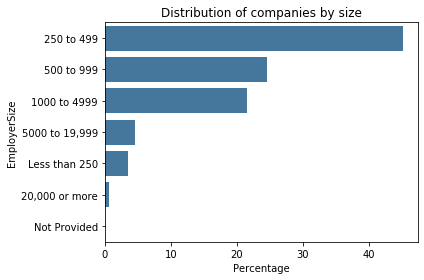

In [52]:
total_emp = sum(emp_size['DiffMeanHourlyPercent'])
emp_size['Percentage'] = (emp_size['DiffMeanHourlyPercent'] / total_emp )*100
emp_size
fig = plt.figure(figsize=(6,4))
ax = sns.barplot(x='Percentage', y='EmployerSize',data=emp_size.sort_values('Percentage',ascending=False), color='#3679ab')
ax.set_title("Distribution of companies by size")

plt.tight_layout()

In [53]:
ax.figure.savefig('Visualizations/EmployerSize2018.png',dpi=400)

From count we see the DiffMeanBonusPercent and DiffMedianBonusPercent have missing values.

The max and min values are also crazy.

In [9]:
#borrowed from Lean's notebook

# Mean because the measurement is mean
mean_bonus_percent = data['DiffMeanBonusPercent'].mean()
data['DiffMeanBonusPercent'] = data['DiffMeanBonusPercent'].fillna(mean_bonus_percent)

# Median because the measurement is median
median_bonus_percent = data['DiffMedianBonusPercent'].median()
data['DiffMedianBonusPercent'] = data['DiffMedianBonusPercent'].fillna(median_bonus_percent)

# keeping crazy data because bonuses can be crazy 16-04
# clean up - dropping all with values bigger than 100
# data = data[(data.DiffMeanBonusPercent>-100) & 
#      (data.DiffMeanBonusPercent<100) &
#      (data.DiffMedianBonusPercent>-100) &
#      (data.DiffMedianBonusPercent<100)]

In [10]:
data['MalePercent'] = (data['MaleLowerQuartile'] +
                     data['MaleLowerMiddleQuartile'] + data['MaleUpperMiddleQuartile'] +
                     data['MaleTopQuartile']) *.25
data['FemalePercent'] = (data['FemaleLowerQuartile'] + data['FemaleLowerMiddleQuartile'] +
                       data['FemaleUpperMiddleQuartile'] + data['FemaleTopQuartile']
                       )*.25
data['WorkforceGenderSkew'] = data['MalePercent'] - data['FemalePercent']

data['PercMaleWorkforceInTopQuartile'] =  data['MaleTopQuartile'] / data['MalePercent'] * .25
data['PercMaleWorkforceInUpperMiddleQuartile'] =  data['MaleUpperMiddleQuartile'] / data['MalePercent'] * .25
data['PercMaleWorkforceInLowerMiddleQuartile'] =  data['MaleLowerMiddleQuartile'] / data['MalePercent'] * .25
data['PercMaleWorkforceInLowerQuartile'] =  data['MaleLowerQuartile'] / data['MalePercent'] * .25

data['PercFemaleWorkforceInTopQuartile'] =  data['FemaleTopQuartile'] /data['FemalePercent']/100 * .25
data['PercFemaleWorkforceInUpperMiddleQuartile'] =  data['FemaleUpperMiddleQuartile'] / data['FemalePercent'] * .25
data['PercFemaleWorkforceInLowerMiddleQuartile'] =  data['FemaleLowerMiddleQuartile'] / data['FemalePercent'] * .25
data['PercFemaleWorkforceInLowerQuartile'] =  data['FemaleLowerQuartile'] / data['FemalePercent'] * .25

data['RepresentationInTopQuartileSkew'] = data['PercMaleWorkforceInTopQuartile'] - data['PercFemaleWorkforceInTopQuartile']
data['RepresentationInUpperMiddleQuartileSkew'] = data['PercMaleWorkforceInUpperMiddleQuartile'] - data['PercFemaleWorkforceInUpperMiddleQuartile']
data['RepresentationInLowerMiddleQuartileSkew'] = data['PercMaleWorkforceInLowerMiddleQuartile'] - data['PercFemaleWorkforceInLowerMiddleQuartile']
data['RepresentationInLowerQuartileSkew'] = data['PercMaleWorkforceInLowerQuartile'] - data['PercFemaleWorkforceInLowerQuartile']

data['BonusGenderSkew'] = data['MaleBonusPercent'] - data['FemaleBonusPercent']

In [11]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,...,PercMaleWorkforceInLowerQuartile,PercFemaleWorkforceInTopQuartile,PercFemaleWorkforceInUpperMiddleQuartile,PercFemaleWorkforceInLowerMiddleQuartile,PercFemaleWorkforceInLowerQuartile,RepresentationInTopQuartileSkew,RepresentationInUpperMiddleQuartileSkew,RepresentationInLowerMiddleQuartileSkew,RepresentationInLowerQuartileSkew,BonusGenderSkew
count,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.00000,10817.00000,...,10815.000000,10815.000000,10815.000000,10815.000000,10815.000000,10813.000000,10813.000000,10813.000000,10813.000000,10817.000000
mean,14.182555,11.882851,18.401390,1.647587,35.706749,34.378941,46.115568,53.884432,50.17099,49.82901,...,0.215813,0.002040,0.229724,0.259105,0.307186,0.297286,0.025020,-0.028979,-0.091390,1.327808
std,14.243119,15.512442,200.536355,270.517216,36.675086,36.375891,24.113495,24.113495,26.19021,26.19021,...,0.058391,0.000714,0.061441,0.062908,0.102049,0.070131,0.094700,0.097199,0.138094,11.847092
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.005000,-0.765892,-0.753769,-0.882353,-100.000000
25%,4.900000,0.900000,7.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.00000,28.00000,...,0.184211,0.001655,0.206667,0.239116,0.252336,0.256228,-0.031453,-0.086701,-0.165414,-1.000000
50%,13.100000,9.500000,21.800000,15.550000,19.200000,17.100000,44.600000,55.400000,48.00000,52.00000,...,0.217957,0.002091,0.240802,0.261745,0.282528,0.285554,0.022802,-0.032552,-0.083810,0.000000
75%,22.400000,21.000000,51.600000,37.500000,75.100000,71.900000,64.500000,73.000000,72.00000,71.00000,...,0.247353,0.002393,0.260870,0.286136,0.338915,0.326407,0.081201,0.023483,-0.007500,3.600000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,...,0.680412,0.010000,1.000000,1.000000,1.000000,0.998571,0.900090,0.500000,0.568201,100.000000


In [12]:
new_data = data[['SicCodes','DiffMeanHourlyPercent','DiffMedianHourlyPercent','DiffMeanBonusPercent',
                 'DiffMedianBonusPercent',
               'MaleLowerQuartile','FemaleLowerQuartile', 'MaleBonusPercent', 'FemaleBonusPercent',
               'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
               'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
               'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize', 'BonusGenderSkew', 'WorkforceGenderSkew',
                 'RepresentationInLowerMiddleQuartileSkew',
                'RepresentationInUpperMiddleQuartileSkew', 'RepresentationInLowerQuartileSkew', 
                 'RepresentationInTopQuartileSkew',
                 'PercMaleWorkforceInTopQuartile','PercMaleWorkforceInUpperMiddleQuartile',
                 'PercMaleWorkforceInLowerMiddleQuartile', 'PercMaleWorkforceInLowerQuartile',
                 'PercFemaleWorkforceInTopQuartile','PercFemaleWorkforceInUpperMiddleQuartile',
                 'PercFemaleWorkforceInLowerMiddleQuartile', 'PercFemaleWorkforceInLowerQuartile',
                ]]
new_data.dropna(axis=0, inplace = True) #droping missing values everywhere
print(new_data.shape)

(10313, 30)


/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [13]:
#picked up on the internet
def sic_desc(df,sic):
    
    df = df[~df.SicCodes.isna()]
    
    df['SicCodes'] = df.apply(lambda row: row.SicCodes.replace('\n','')\
                                                      .replace('\r','')\
                                                      .split(','), axis=1)
    df = df.explode('SicCodes')
    df['SicCodes'] = pd.to_numeric(df.SicCodes)
    
    return df.merge(sic, how='left', left_on='SicCodes', 
                    right_on='SIC Code')

In [14]:
siccodeUrl = "data/siccodes/SIC07_CH_condensed_list_en.csv"
siccode = pd.read_csv(siccodeUrl)
siccode.head()

,SIC Code,Description
0,1110,"Growing of cereals (except rice), leguminous c..."
1,1120,Growing of rice
2,1130,"Growing of vegetables and melons, roots and tu..."
3,1140,Growing of sugar cane
4,1150,Growing of tobacco


In [15]:
new_data = sic_desc(new_data,siccode)

In [16]:
# https://www.datacamp.com/community/tutorials/categorical-data
#used label encoding but would one hot encoding be better
new_data['EmployerSize'] = new_data['EmployerSize'].astype('category')
print(new_data['EmployerSize'].unique())
new_data['EmployerSize'] = new_data['EmployerSize'].cat.codes
print(new_data['EmployerSize'].unique())

[500 to 999, 250 to 499, 1000 to 4999, 5000 to 19,999, Less than 250, 20,000 or more, Not Provided]
Categories (7, object): [500 to 999, 250 to 499, 1000 to 4999, 5000 to 19,999, Less than 250, 20,000 or more, Not Provided]
[3 2 0 4 5 1 6]


In [17]:
new_data.describe()

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleBonusPercent,FemaleBonusPercent,MaleLowerMiddleQuartile,...,RepresentationInTopQuartileSkew,PercMaleWorkforceInTopQuartile,PercMaleWorkforceInUpperMiddleQuartile,PercMaleWorkforceInLowerMiddleQuartile,PercMaleWorkforceInLowerQuartile,PercFemaleWorkforceInTopQuartile,PercFemaleWorkforceInUpperMiddleQuartile,PercFemaleWorkforceInLowerMiddleQuartile,PercFemaleWorkforceInLowerQuartile,SIC Code
count,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,...,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,15743.000000,13909.000000
mean,56614.537953,14.480252,12.871562,19.061834,3.047186,44.343302,55.656698,32.446827,30.984965,48.329378,...,0.300273,0.302316,0.255816,0.228781,0.213087,0.002043,0.229833,0.259843,0.306023,64079.433245
std,30100.172763,13.728399,15.772262,170.568240,240.931637,24.609982,24.609982,36.196435,35.682490,26.527230,...,0.070259,0.070024,0.046778,0.047317,0.059480,0.000695,0.060397,0.061464,0.101606,23390.617747
min,1.000000,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1110.000000
25%,41100.000000,5.400000,1.500000,6.300000,0.000000,24.000000,36.450000,0.000000,0.000000,26.500000,...,0.257908,0.259887,0.236188,0.205882,0.180272,0.001681,0.209828,0.240964,0.252959,46730.000000
50%,62090.000000,13.800000,10.600000,18.401390,15.550000,42.000000,58.000000,13.000000,11.000000,45.000000,...,0.287730,0.289403,0.258333,0.235669,0.216000,0.002109,0.240928,0.261745,0.280507,70100.000000
75%,85100.000000,22.800000,22.350000,49.500000,35.800000,63.550000,76.000000,70.000000,65.100000,71.000000,...,0.331178,0.333333,0.277788,0.256535,0.246531,0.002382,0.260167,0.284295,0.333623,85200.000000
max,99999.000000,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.998571,1.000000,1.000000,0.698925,0.680412,0.010000,1.000000,1.000000,1.000000,99999.000000


In [18]:
new_data.dropna(axis=0) #dropping ones without siccode

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleBonusPercent,FemaleBonusPercent,MaleLowerMiddleQuartile,...,PercMaleWorkforceInTopQuartile,PercMaleWorkforceInUpperMiddleQuartile,PercMaleWorkforceInLowerMiddleQuartile,PercMaleWorkforceInLowerQuartile,PercFemaleWorkforceInTopQuartile,PercFemaleWorkforceInUpperMiddleQuartile,PercFemaleWorkforceInLowerMiddleQuartile,PercFemaleWorkforceInLowerQuartile,SIC Code,Description
0,85310,19.6,32.5,18.40139,15.55,32.4,67.6,0.0,0.0,38.2,...,0.315758,0.265995,0.226303,0.191943,0.002020,0.238322,0.267301,0.292388,85310.0,General secondary education
1,47730,7.7,-4.2,23.70000,-75.20,31.6,68.4,22.2,82.0,12.7,...,0.266404,0.152231,0.166667,0.414698,0.002461,0.273008,0.269611,0.211242,47730.0,Dispensing chemist in specialised stores
2,61900,7.7,12.7,11.30000,10.90,41.0,59.0,67.0,52.0,45.0,...,0.291667,0.260417,0.234375,0.213542,0.002115,0.240385,0.264423,0.283654,61900.0,Other telecommunications activities
3,78300,30.0,29.0,-10.00000,69.00,0.0,100.0,46.0,74.0,2.0,...,0.568182,0.386364,0.045455,0.000000,0.002107,0.233146,0.275281,0.280899,78300.0,Human resources provision and management of hu...
4,85200,13.4,12.7,0.00000,0.00,38.1,61.9,0.0,0.0,43.6,...,0.320272,0.252874,0.227795,0.199060,0.001855,0.247363,0.270374,0.296740,85200.0,Primary education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15738,78300,26.6,29.6,56.90000,53.20,36.9,63.1,95.0,94.0,38.8,...,0.352736,0.270647,0.193035,0.183582,0.001462,0.229146,0.307538,0.317085,78300.0,Human resources provision and management of hu...
15739,82990,26.6,29.6,56.90000,53.20,36.9,63.1,95.0,94.0,38.8,...,0.352736,0.270647,0.193035,0.183582,0.001462,0.229146,0.307538,0.317085,82990.0,Other business support service activities n.e.c.
15740,82990,22.3,23.8,51.60000,50.60,37.9,62.1,95.0,96.0,61.8,...,0.291407,0.294728,0.256538,0.157327,0.001873,0.182275,0.240101,0.390321,82990.0,Other business support service activities n.e.c.
15741,70100,25.0,21.0,48.00000,56.00,41.0,59.0,58.0,84.0,62.0,...,0.313725,0.282353,0.243137,0.160784,0.001379,0.193103,0.262069,0.406897,70100.0,Activities of head offices


get percentage of women at each quartile as a factor of total women employees

In [19]:
new_data['FemalePerc']= 0.25 * (new_data.FemaleLowerQuartile + new_data.FemaleLowerMiddleQuartile +
                          new_data.FemaleUpperMiddleQuartile + new_data.FemaleTopQuartile)

In [20]:
new_data['MalePerc'] = 100 - new_data['FemalePerc']

In [21]:
# new_data['MalePercTest']= 0.25 * (new_data.MaleLowerQuartile + new_data.MaleLowerMiddleQuartile +
#                           new_data.MaleUpperMiddleQuartile + new_data.MaleTopQuartile)

In [22]:
new_data.head()

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleBonusPercent,FemaleBonusPercent,MaleLowerMiddleQuartile,...,PercMaleWorkforceInLowerMiddleQuartile,PercMaleWorkforceInLowerQuartile,PercFemaleWorkforceInTopQuartile,PercFemaleWorkforceInUpperMiddleQuartile,PercFemaleWorkforceInLowerMiddleQuartile,PercFemaleWorkforceInLowerQuartile,SIC Code,Description,FemalePerc,MalePerc
0,85310,19.6,32.5,18.40139,15.55,32.4,67.6,0.0,0.0,38.2,...,0.226303,0.191943,0.002020,0.238322,0.267301,0.292388,85310.0,General secondary education,57.80,42.20
1,47730,7.7,-4.2,23.70000,-75.20,31.6,68.4,22.2,82.0,12.7,...,0.166667,0.414698,0.002461,0.273008,0.269611,0.211242,47730.0,Dispensing chemist in specialised stores,80.95,19.05
2,61900,7.7,12.7,11.30000,10.90,41.0,59.0,67.0,52.0,45.0,...,0.234375,0.213542,0.002115,0.240385,0.264423,0.283654,61900.0,Other telecommunications activities,52.00,48.00
3,78300,30.0,29.0,-10.00000,69.00,0.0,100.0,46.0,74.0,2.0,...,0.045455,0.000000,0.002107,0.233146,0.275281,0.280899,78300.0,Human resources provision and management of hu...,89.00,11.00
4,85200,13.4,12.7,0.00000,0.00,38.1,61.9,0.0,0.0,43.6,...,0.227795,0.199060,0.001855,0.247363,0.270374,0.296740,85200.0,Primary education,52.15,47.85


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from math import sqrt
# https://www.kaggle.com/learn/intro-to-machine-learning

In [24]:
def decision_tree(train_X, val_X, train_y, val_y):
    # Define model. Specify a number for random_state to ensure same results each run
    model = DecisionTreeRegressor(random_state=1, max_depth=10, min_samples_split=10)

    # Fit model
    model.fit(train_X, train_y)

    # get predicted prices on validation data
    val_predictions = model.predict(val_X)
    print("Decision tree mean absolute error:",mean_absolute_error(val_y, val_predictions))
    print("Decision tree root mean squared error:",sqrt(mean_squared_error(val_y, val_predictions)))
    #print("Decision tree AIC:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Decision tree R^2 score: ",model.score(val_X, val_y))
    return model

In [25]:
def random_forest(train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(random_state=1)
    forest_model.fit(train_X, train_y)
    new_preds = forest_model.predict(val_X)
    print("Random forest mae:",mean_absolute_error(val_y, new_preds))
    print("Random forest rmse:",sqrt(mean_squared_error(val_y, new_preds)))
    #print("Random forest AIC: ", aic(val_y, new_preds, len(val_X.columns) ))
    print("Random forest R^2 score:", forest_model.score(val_X, val_y)) #coefficient of determination R^2 of the prediction
    #accuracy(val_y,new_preds)
    return forest_model

In [26]:
#https://en.wikipedia.org/wiki/Akaike_information_criterion
#https://www.reddit.com/r/statistics/comments/5h2rbw/does_python_have_a_package_for_aicbic/
def aic(y, pred, k):
    error = y - pred
    sse = sum(error ** 2)
    aic = 2 * k - 2 * np.log(sse)
    return aic

In [27]:
def feature_imp(model, train_X):
    feature_importances = pd.DataFrame(model.feature_importances_,
    index = train_X.columns,
    columns=['importance']).sort_values('importance', ascending=False)
    sns.barplot(data=feature_importances.reset_index(),x='importance',y='index',orient='h')

In [28]:
def adaboost(train_X, val_X, train_y, val_y):
    adaboost_model = AdaBoostRegressor(random_state=1)
    adaboost_model.fit(train_X, train_y)
    val_predictions = adaboost_model.predict(val_X)
    print("Adaboost mae:",mean_absolute_error(val_y, val_predictions))
    print("Adaboost rmse:",sqrt(mean_squared_error(val_y, val_predictions)))
   # print("Adaboost aic:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Adaboost R^2 score", adaboost_model.score(val_X, val_y))
    return adaboost_model

In [29]:
def gradboost(train_X, val_X, train_y, val_y):
    grad_model = GradientBoostingRegressor(random_state=1)
    grad_model.fit(train_X, train_y)
    val_predictions = grad_model.predict(val_X)
    print("Gradient Boosting mae:",mean_absolute_error(val_y, val_predictions))
    print("Gradient Boosting rmse:",sqrt(mean_squared_error(val_y, val_predictions)))
    #print("Gradient Boosting aic:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Gradient Boosting R^2 score", grad_model.score(val_X, val_y))
    return grad_model

In [33]:
def xgboost(train_X, val_X, train_y, val_y):
    xgboost_model = XGBRegressor(random_state=1)
    xgboost_model.fit(train_X, train_y)
    val_predictions = xgboost_model.predict(val_X)
    print("XGBoost mae:",mean_absolute_error(val_y, val_predictions))
    print("XGBoost rmse:",sqrt(mean_squared_error(val_y, val_predictions)))
    #print("Gradient Boosting aic:",aic(val_y, val_predictions, len(val_X.columns)))
    print("XGBoost R^2 score", xgboost_model.score(val_X, val_y))
    return xgboost_model

In [40]:
def extraTreeRegressor(train_X, val_X, train_y, val_y):
    extratree_model = ExtraTreesRegressor(random_state=1)
    extratree_model.fit(train_X, train_y)
    val_predictions = extratree_model.predict(val_X)
    print("Extra tree mae:",mean_absolute_error(val_y, val_predictions))
    print("Extra tree rmse:",sqrt(mean_squared_error(val_y, val_predictions)))
    #print("Gradient Boosting aic:",aic(val_y, val_predictions, len(val_X.columns)))
    print("Extra tree R^2 score", extratree_model.score(val_X, val_y))
    return extratree_model

In [31]:
def accuracy(target, pred): #bad idea for this since target may be zero
    # Calculate mean absolute percentage error (MAPE)
    errors = abs(target - pred)
    mape = 100 * (errors / target)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

In [35]:
#predict mean hourly rate
y = new_data.DiffMeanHourlyPercent
# features = ['DiffMeanBonusPercent','DiffMedianBonusPercent','MaleBonusPercent',
#        'FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
#        'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
#        'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
#        'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize','SicCodes']
features =['SicCodes','MaleBonusPercent', 'FemaleBonusPercent',
               'MaleLowerQuartile','FemaleLowerQuartile', 
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize', 'BonusGenderSkew', 'WorkforceGenderSkew',
                 'RepresentationInLowerMiddleQuartileSkew',
                'RepresentationInUpperMiddleQuartileSkew', 'RepresentationInLowerQuartileSkew',
           'RepresentationInTopQuartileSkew',
                            'PercMaleWorkforceInTopQuartile','PercMaleWorkforceInUpperMiddleQuartile',
           'PercMaleWorkforceInLowerMiddleQuartile', 'PercMaleWorkforceInLowerQuartile',
                 'PercFemaleWorkforceInTopQuartile','PercFemaleWorkforceInUpperMiddleQuartile',
           'PercFemaleWorkforceInLowerMiddleQuartile', 'PercFemaleWorkforceInLowerQuartile',
           ]
X = new_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1) #test_size=0.25
decision_tree_model = decision_tree(train_X, val_X, train_y, val_y)
forest_model = random_forest(train_X, val_X, train_y, val_y)

Decision tree mean absolute error: 5.863315953813247
Decision tree root mean squared error: 8.96716434510044
Decision tree R^2 score:  0.5949130107021345
Random forest mae: 4.120263465447154
Random forest rmse: 7.220987850378578
Random forest R^2 score: 0.7373174252442307


In [ ]:
adaboost_model = adaboost(train_X, val_X, train_y, val_y)
gradboost_model = gradboost(train_X, val_X, train_y, val_y)

In [34]:
xgboost_model = xgboost(train_X,val_X,train_y,val_y)

XGBoost mae: 4.658475705778332
XGBoost rmse: 7.465718530332838
XGBoost R^2 score 0.7192102433100065


In [41]:
tree_model = extraTreeRegressor(train_X, val_X, train_y, val_y)

Extra tree mae: 3.5459209857723617
Extra tree rmse: 7.12604259978091
Extra tree R^2 score 0.744179782141777


In [42]:
def correlatePredictions(model, val_X, val_y, name):
    preds = model.predict(val_X)
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.scatterplot(preds, val_y)
    # ax.plot(val_X.index, preds,label='Predicted value')
    #ax.legend()
    ax.set(xlabel='Predictions', ylabel='Actual pay gap',
           title=name)
    plt.show()

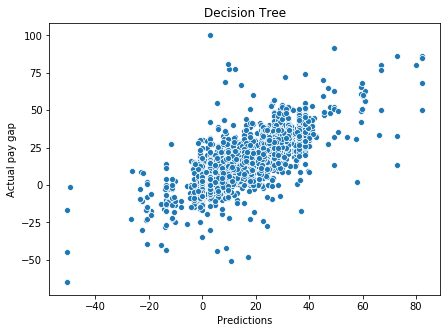

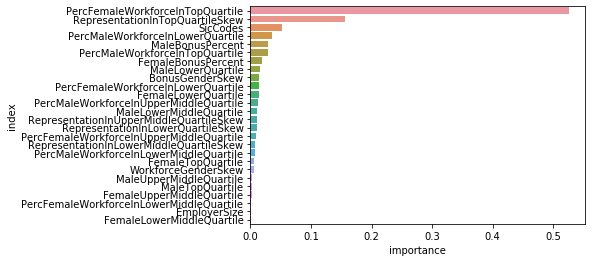

In [32]:
correlatePredictions(decision_tree_model,val_X,val_y,"Decision Tree")
feature_imp(decision_tree_model,train_X)

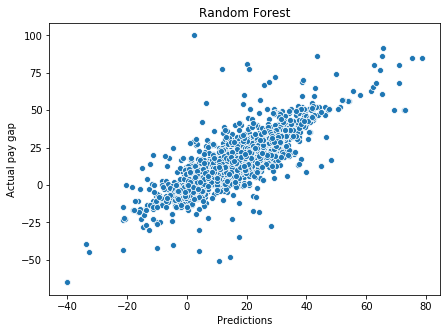

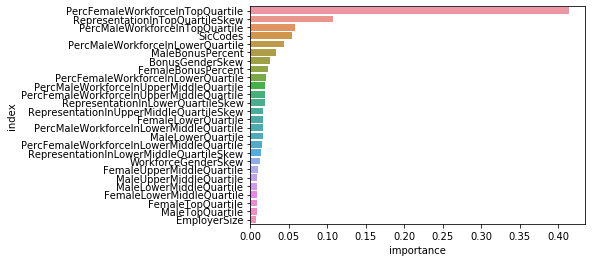

In [33]:
correlatePredictions(forest_model,val_X,val_y,"Random Forest")
feature_imp(forest_model,train_X)

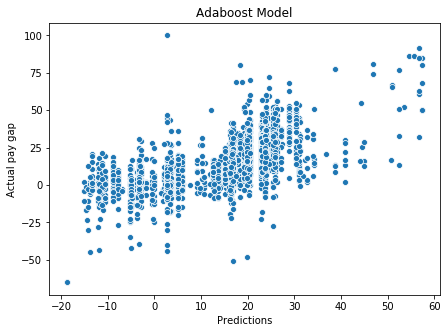

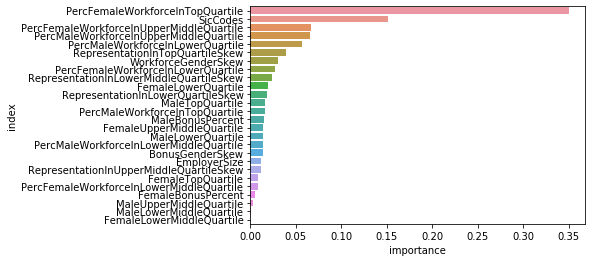

In [34]:
correlatePredictions(adaboost_model,val_X,val_y,"Adaboost Model")
feature_imp(adaboost_model,train_X)

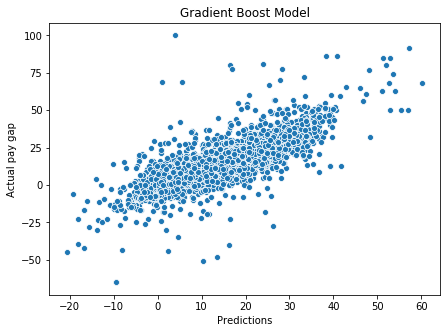

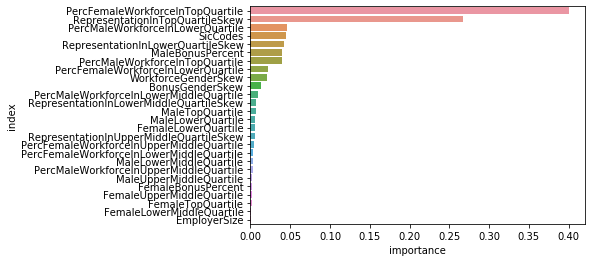

In [35]:
correlatePredictions(gradboost_model,val_X,val_y,"Gradient Boost Model")
feature_imp(gradboost_model,train_X)

In [43]:
#predict median hourly rate
#https://stats.stackexchange.com/questions/131267/how-to-interpret-error-measures
y = new_data.DiffMedianHourlyPercent
# features = ['DiffMedianBonusPercent','DiffMeanBonusPercent','MaleBonusPercent',
#        'FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
#        'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
#        'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
#        'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize','SicCodes']

features = ['SicCodes','MaleBonusPercent', 'FemaleBonusPercent',
               'MaleLowerQuartile','FemaleLowerQuartile', 
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize', 'BonusGenderSkew', 'WorkforceGenderSkew',
                 'RepresentationInLowerMiddleQuartileSkew',
                'RepresentationInUpperMiddleQuartileSkew', 'RepresentationInLowerQuartileSkew', 'RepresentationInTopQuartileSkew',
                            'PercMaleWorkforceInTopQuartile','PercMaleWorkforceInUpperMiddleQuartile',
            'PercMaleWorkforceInLowerMiddleQuartile', 'PercMaleWorkforceInLowerQuartile',
                 'PercFemaleWorkforceInTopQuartile','PercFemaleWorkforceInUpperMiddleQuartile',
            'PercFemaleWorkforceInLowerMiddleQuartile', 'PercFemaleWorkforceInLowerQuartile']


X = new_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
median_decision_tree_model = decision_tree(train_X, val_X, train_y, val_y)
median_forest_model = random_forest(train_X, val_X, train_y, val_y)
median_adaboost_model = adaboost(train_X, val_X, train_y, val_y)
median_gradboost_model = gradboost(train_X, val_X, train_y, val_y)

Decision tree mean absolute error: 6.613299066737721
Decision tree root mean squared error: 10.680925360626532
Decision tree R^2 score:  0.5433235674262946
Random forest mae: 4.4387233231707315
Random forest rmse: 7.619096473460643
Random forest R^2 score: 0.7676205150540029
Adaboost mae: 8.699525329164059
Adaboost rmse: 11.537772084797734
Adaboost R^2 score 0.46711345973636176
Gradient Boosting mae: 6.164439689064073
Gradient Boosting rmse: 9.155098335907102
Gradient Boosting R^2 score 0.6644811949552317


In [44]:
median_xgboost_model = xgboost(train_X,val_X,train_y,val_y)
median_tree_model = extraTreeRegressor(train_X, val_X, train_y, val_y)

XGBoost mae: 5.053810264844054
XGBoost rmse: 7.9982287959621345
XGBoost R^2 score 0.7439183342652886
Extra tree mae: 3.711063008130085
Extra tree rmse: 7.301758517206492
Extra tree R^2 score 0.7865747635276393


In [37]:
# from sklearn import tree
# import graphviz

# tree_graph = tree.export_graphviz(median_decision_tree_model, out_file=None, feature_names=features)
# graphviz.Source(tree_graph)

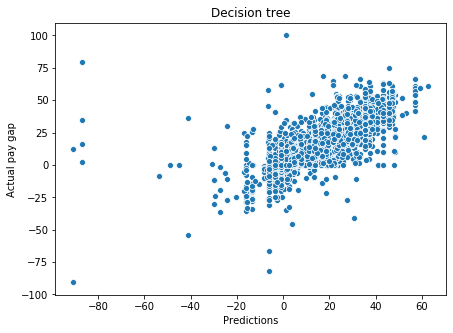

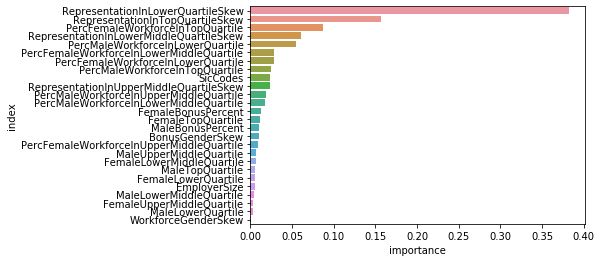

In [38]:
correlatePredictions(median_decision_tree_model,val_X,val_y,"Decision tree")
feature_imp(median_decision_tree_model,train_X)

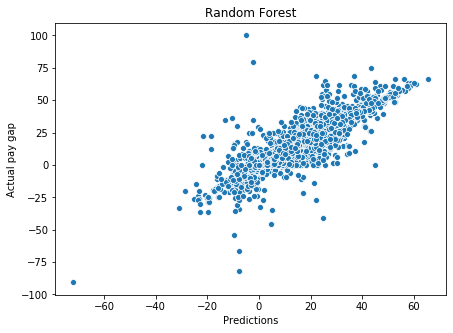

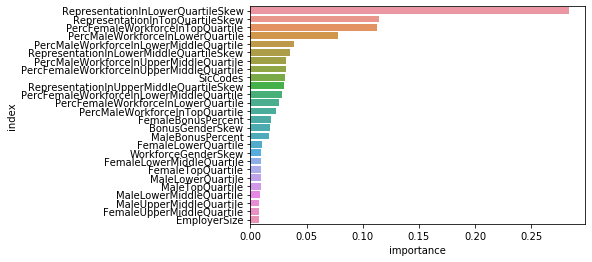

In [39]:
correlatePredictions(median_forest_model,val_X,val_y,"Random Forest")
feature_imp(median_forest_model,train_X)

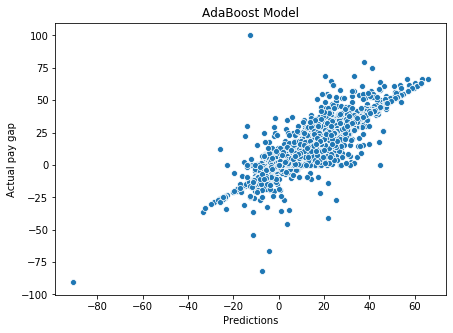

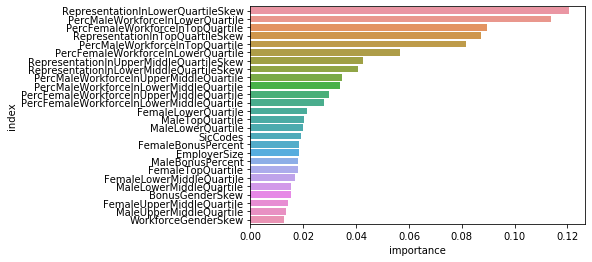

In [45]:
correlatePredictions(median_adaboost_model,val_X,val_y,"AdaBoost Model")
feature_imp(median_adaboost_model,train_X)

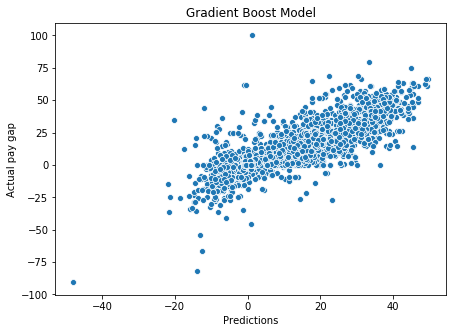

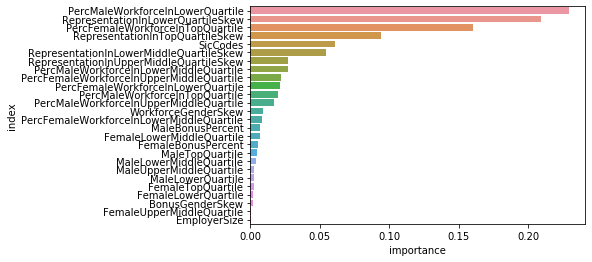

In [41]:
correlatePredictions(median_gradboost_model,val_X,val_y,"Gradient Boost Model")

feature_imp(median_gradboost_model,train_X)

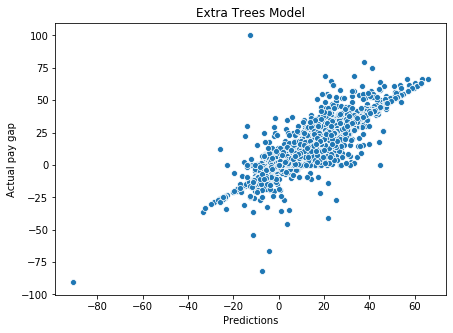

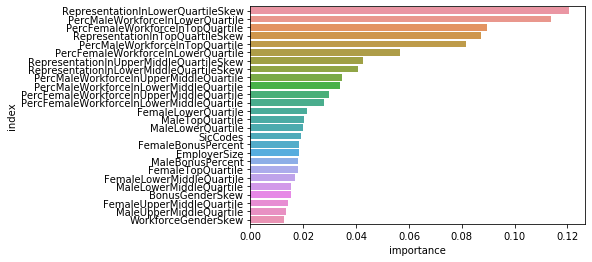

In [46]:
correlatePredictions(median_tree_model,val_X,val_y,"Extra Trees Model")
feature_imp(median_tree_model,train_X)

In [42]:
trial_data = data.copy()

In [43]:
new_data.groupby('EmployerSize').count()['DiffMeanHourlyPercent'].sort_values(ascending=False)

EmployerSize
2    7015
3    3812
0    3514
4     808
5     484
1      99
6      11
Name: DiffMeanHourlyPercent, dtype: int64

In [44]:
new_data.groupby('SicCodes').count()['DiffMeanHourlyPercent'].sort_values(ascending=False)

SicCodes
1        1834
85310     654
82990     578
85200     438
84110     383
         ... 
24410       1
24520       1
25290       1
74201       1
46360       1
Name: DiffMeanHourlyPercent, Length: 621, dtype: int64

Imbalance in class...This needs work

### Hyperparameter tuning for random forest

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from numpy import mean
from numpy import std

In [46]:
#Number of samples
def get_models():
    models = dict()
    models['10'] = RandomForestRegressor(max_samples=0.1)
    models['20'] = RandomForestRegressor(max_samples=0.2)
    models['30'] = RandomForestRegressor(max_samples=0.3)
    models['40'] = RandomForestRegressor(max_samples=0.4)
    models['50'] = RandomForestRegressor(max_samples=0.5)
    models['60'] = RandomForestRegressor(max_samples=0.6)
    models['70'] = RandomForestRegressor(max_samples=0.7)
    models['80'] = RandomForestRegressor(max_samples=0.8)
    models['90'] = RandomForestRegressor(max_samples=0.9)
    models['100'] = RandomForestRegressor(max_samples=None)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [47]:
y = new_data.DiffMedianHourlyPercent
features = ['SicCodes','MaleBonusPercent', 'FemaleBonusPercent',
               'MaleLowerQuartile','FemaleLowerQuartile', 
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize', 'BonusGenderSkew', 'WorkforceGenderSkew',
                 'RepresentationInLowerMiddleQuartileSkew',
                'RepresentationInUpperMiddleQuartileSkew', 'RepresentationInLowerQuartileSkew', 'RepresentationInTopQuartileSkew',
                            'PercMaleWorkforceInTopQuartile','PercMaleWorkforceInUpperMiddleQuartile',
            'PercMaleWorkforceInLowerMiddleQuartile', 'PercMaleWorkforceInLowerQuartile',
                 'PercFemaleWorkforceInTopQuartile','PercFemaleWorkforceInUpperMiddleQuartile',
            'PercFemaleWorkforceInLowerMiddleQuartile', 'PercFemaleWorkforceInLowerQuartile']


X = new_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

>10 -5.987 (0.151)
>20 -5.546 (0.158)


KeyboardInterrupt: 

In [48]:
len(features)

26

In [49]:
def random_forest(train_X, val_X, train_y, val_y, n_estimators=100,max_samples=None,max_features=26,max_depth=None ):
    forest_model = RandomForestRegressor(random_state=1,n_estimators=n_estimators,max_samples=max_samples,
                                        max_features=max_features,max_depth=max_depth)
    forest_model.fit(train_X, train_y)
    new_preds = forest_model.predict(val_X)
    print("Random forest mae:",mean_absolute_error(val_y, new_preds))
    print("Random forest rmse:",sqrt(mean_squared_error(val_y, new_preds)))
    #print("Random forest AIC: ", aic(val_y, new_preds, len(val_X.columns) ))
    print("Random forest R^2 score:", forest_model.score(val_X, val_y)) #coefficient of determination R^2 of the prediction
    #accuracy(val_y,new_preds)
    return forest_model

In [50]:
rf_model1 = random_forest(train_X, val_X, train_y, val_y,
                        1000,None, 26 ,None )

Random forest mae: 4.383424339430894
Random forest rmse: 7.578318957226554
Random forest R^2 score: 0.7701012555949809


In [51]:
rf_model2 = random_forest(train_X, val_X, train_y, val_y,
                        100,None, 5,None )

Random forest mae: 4.319131605691057
Random forest rmse: 7.4426781584811055
Random forest R^2 score: 0.7782573067440235


In [52]:
rf_model3 = random_forest(train_X, val_X, train_y, val_y,
                        500,None, 5,None)

Random forest mae: 4.271656605691057
Random forest rmse: 7.40287042074227
Random forest R^2 score: 0.780622979058684


In [53]:
rf_model4 = random_forest(train_X, val_X, train_y, val_y,
                        1000,None, 'sqrt',None) #using this one

Random forest mae: 4.2644926829268295
Random forest rmse: 7.394931435718911
Random forest R^2 score: 0.7810932552907517


In [54]:
rf_model5 = random_forest(train_X, val_X, train_y, val_y,
                        2000,None, 5,None)

Random forest mae: 4.265716514227645
Random forest rmse: 7.398416160642547
Random forest R^2 score: 0.7808868951559483


In [55]:
rf_model6 = random_forest(train_X, val_X, train_y, val_y,
                        1500,None, 5,None)

Random forest mae: 4.263319867886179
Random forest rmse: 7.393974989419492
Random forest R^2 score: 0.7811498775888196


In [56]:
y = new_data.DiffMeanHourlyPercent
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)


In [57]:
rf_mean_model1 = random_forest(train_X, val_X, train_y, val_y,
                        500,None, 26,None)

Random forest mae: 4.084947713414632
Random forest rmse: 7.194401672953685
Random forest R^2 score: 0.7392481497849406


In [58]:
rf_mean_model2 = random_forest(train_X, val_X, train_y, val_y,
                        1000,None, 5,None)

Random forest mae: 4.0440926067073155
Random forest rmse: 7.274649743362923
Random forest R^2 score: 0.7333987312849939


## Permutation importance

https://www.kaggle.com/dansbecker/permutation-importance

In [52]:
import eli5
from eli5.sklearn import PermutationImportance

/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/tensorflow/python/fr

In [53]:
perm = PermutationImportance(rf_model4, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1011 ± 0.0039,RepresentationInLowerQuartileSkew
0.0791 ± 0.0018,RepresentationInTopQuartileSkew
0.0716 ± 0.0043,PercMaleWorkforceInLowerQuartile
0.0686 ± 0.0033,PercFemaleWorkforceInTopQuartile
0.0635 ± 0.0034,PercMaleWorkforceInTopQuartile
0.0430 ± 0.0023,PercFemaleWorkforceInLowerQuartile
0.0259 ± 0.0043,RepresentationInLowerMiddleQuartileSkew
0.0247 ± 0.0023,PercMaleWorkforceInUpperMiddleQuartile
0.0245 ± 0.0025,RepresentationInUpperMiddleQuartileSkew
0.0233 ± 0.0027,PercMaleWorkforceInLowerMiddleQuartile


In [46]:
perm = PermutationImportance(median_forest_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.3449 ± 0.0194,RepresentationInLowerQuartileSkew
0.1689 ± 0.0100,RepresentationInTopQuartileSkew
0.1226 ± 0.0081,PercFemaleWorkforceInTopQuartile
0.0794 ± 0.0046,PercMaleWorkforceInLowerQuartile
0.0468 ± 0.0022,PercMaleWorkforceInLowerMiddleQuartile
0.0404 ± 0.0022,PercFemaleWorkforceInLowerMiddleQuartile
0.0320 ± 0.0026,SicCodes
0.0298 ± 0.0040,PercFemaleWorkforceInUpperMiddleQuartile
0.0294 ± 0.0065,RepresentationInLowerMiddleQuartileSkew
0.0292 ± 0.0046,FemaleBonusPercent


In [47]:
perm = PermutationImportance(median_gradboost_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1019 ± 0.0051,PercFemaleWorkforceInTopQuartile
0.0998 ± 0.0064,RepresentationInLowerQuartileSkew
0.0928 ± 0.0080,SicCodes
0.0763 ± 0.0082,PercMaleWorkforceInLowerQuartile
0.0621 ± 0.0038,RepresentationInTopQuartileSkew
0.0250 ± 0.0024,RepresentationInLowerMiddleQuartileSkew
0.0228 ± 0.0062,WorkforceGenderSkew
0.0148 ± 0.0026,PercMaleWorkforceInLowerMiddleQuartile
0.0133 ± 0.0026,RepresentationInUpperMiddleQuartileSkew
0.0111 ± 0.0013,PercFemaleWorkforceInUpperMiddleQuartile


## Partial dependence plot

In [54]:
from pdpbox import pdp, get_dataset, info_plots

In [58]:
plt.rcParams['figure.dpi'] = 400

In [59]:
def pdpFunction(model,data,features,feature_to_plot):
    pdp_score = pdp.pdp_isolate(model=model, dataset=data, model_features=features,
                                feature=feature_to_plot)
    pdp.pdp_plot(pdp_score, feature_to_plot)
    plt.show()
    #pdp.plt.savefig('Visualizations/'+feature_to_plot+'.png')

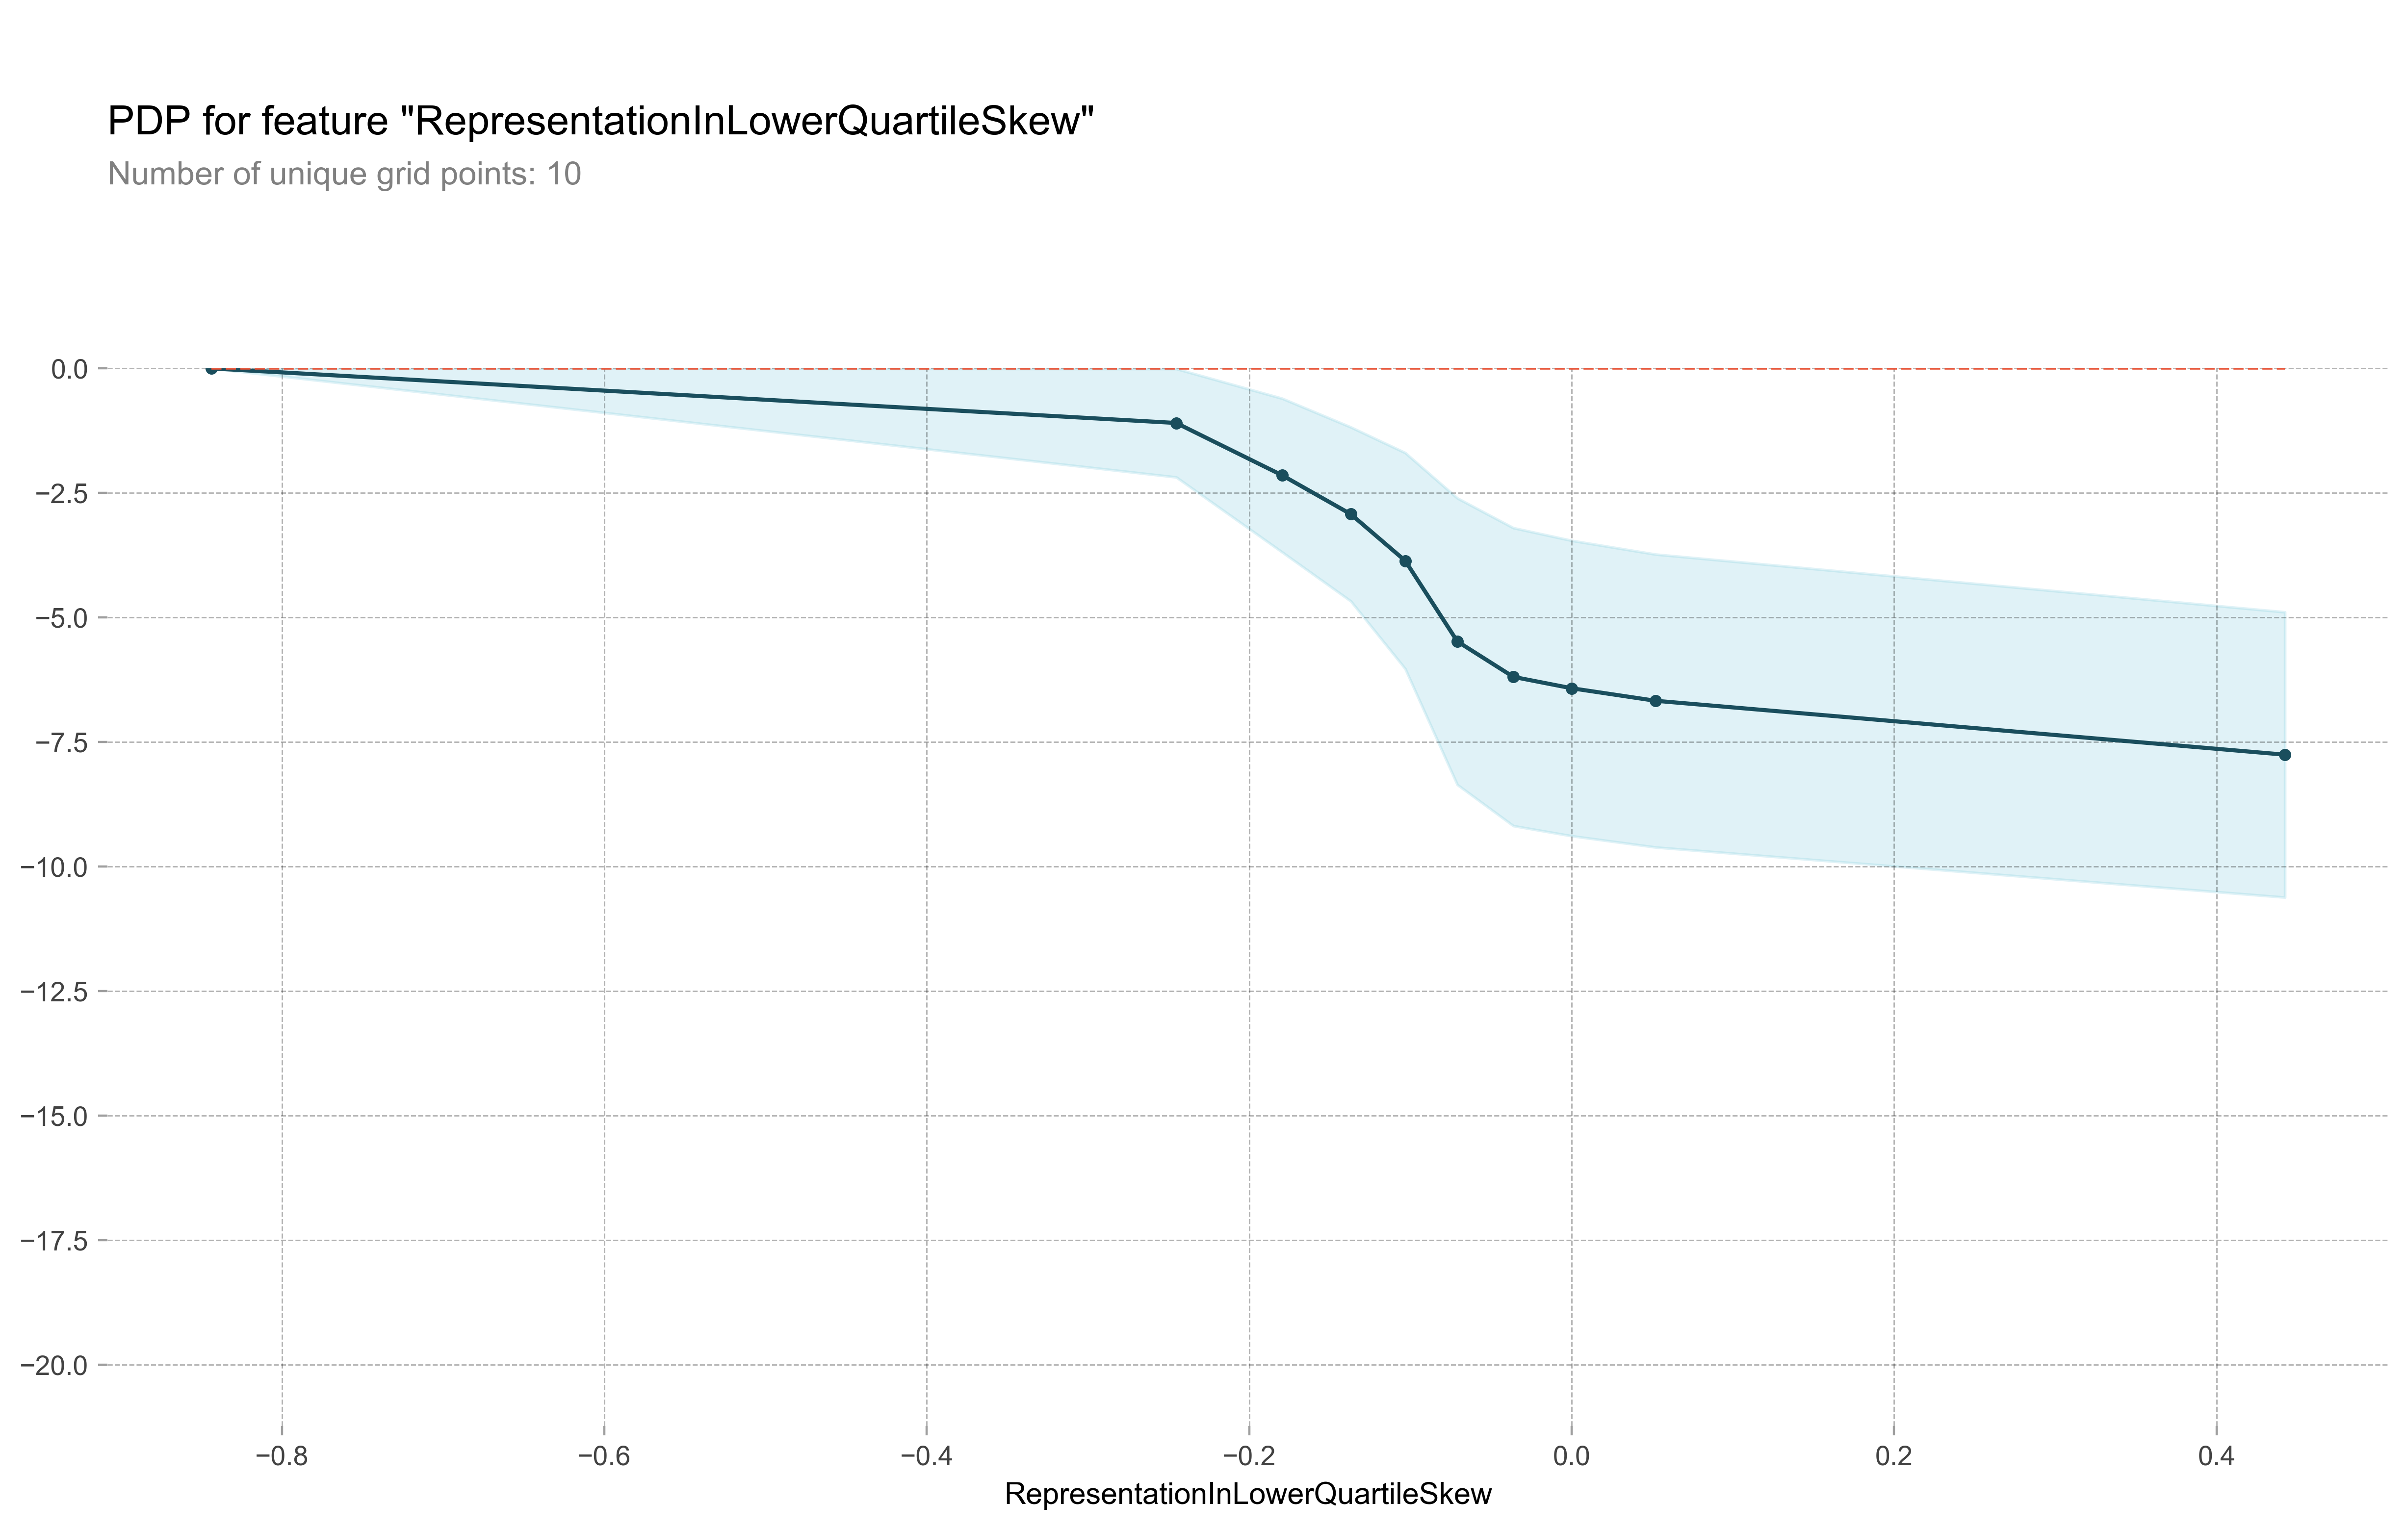

In [60]:
pdpFunction(rf_model4,val_X,features,'RepresentationInLowerQuartileSkew')

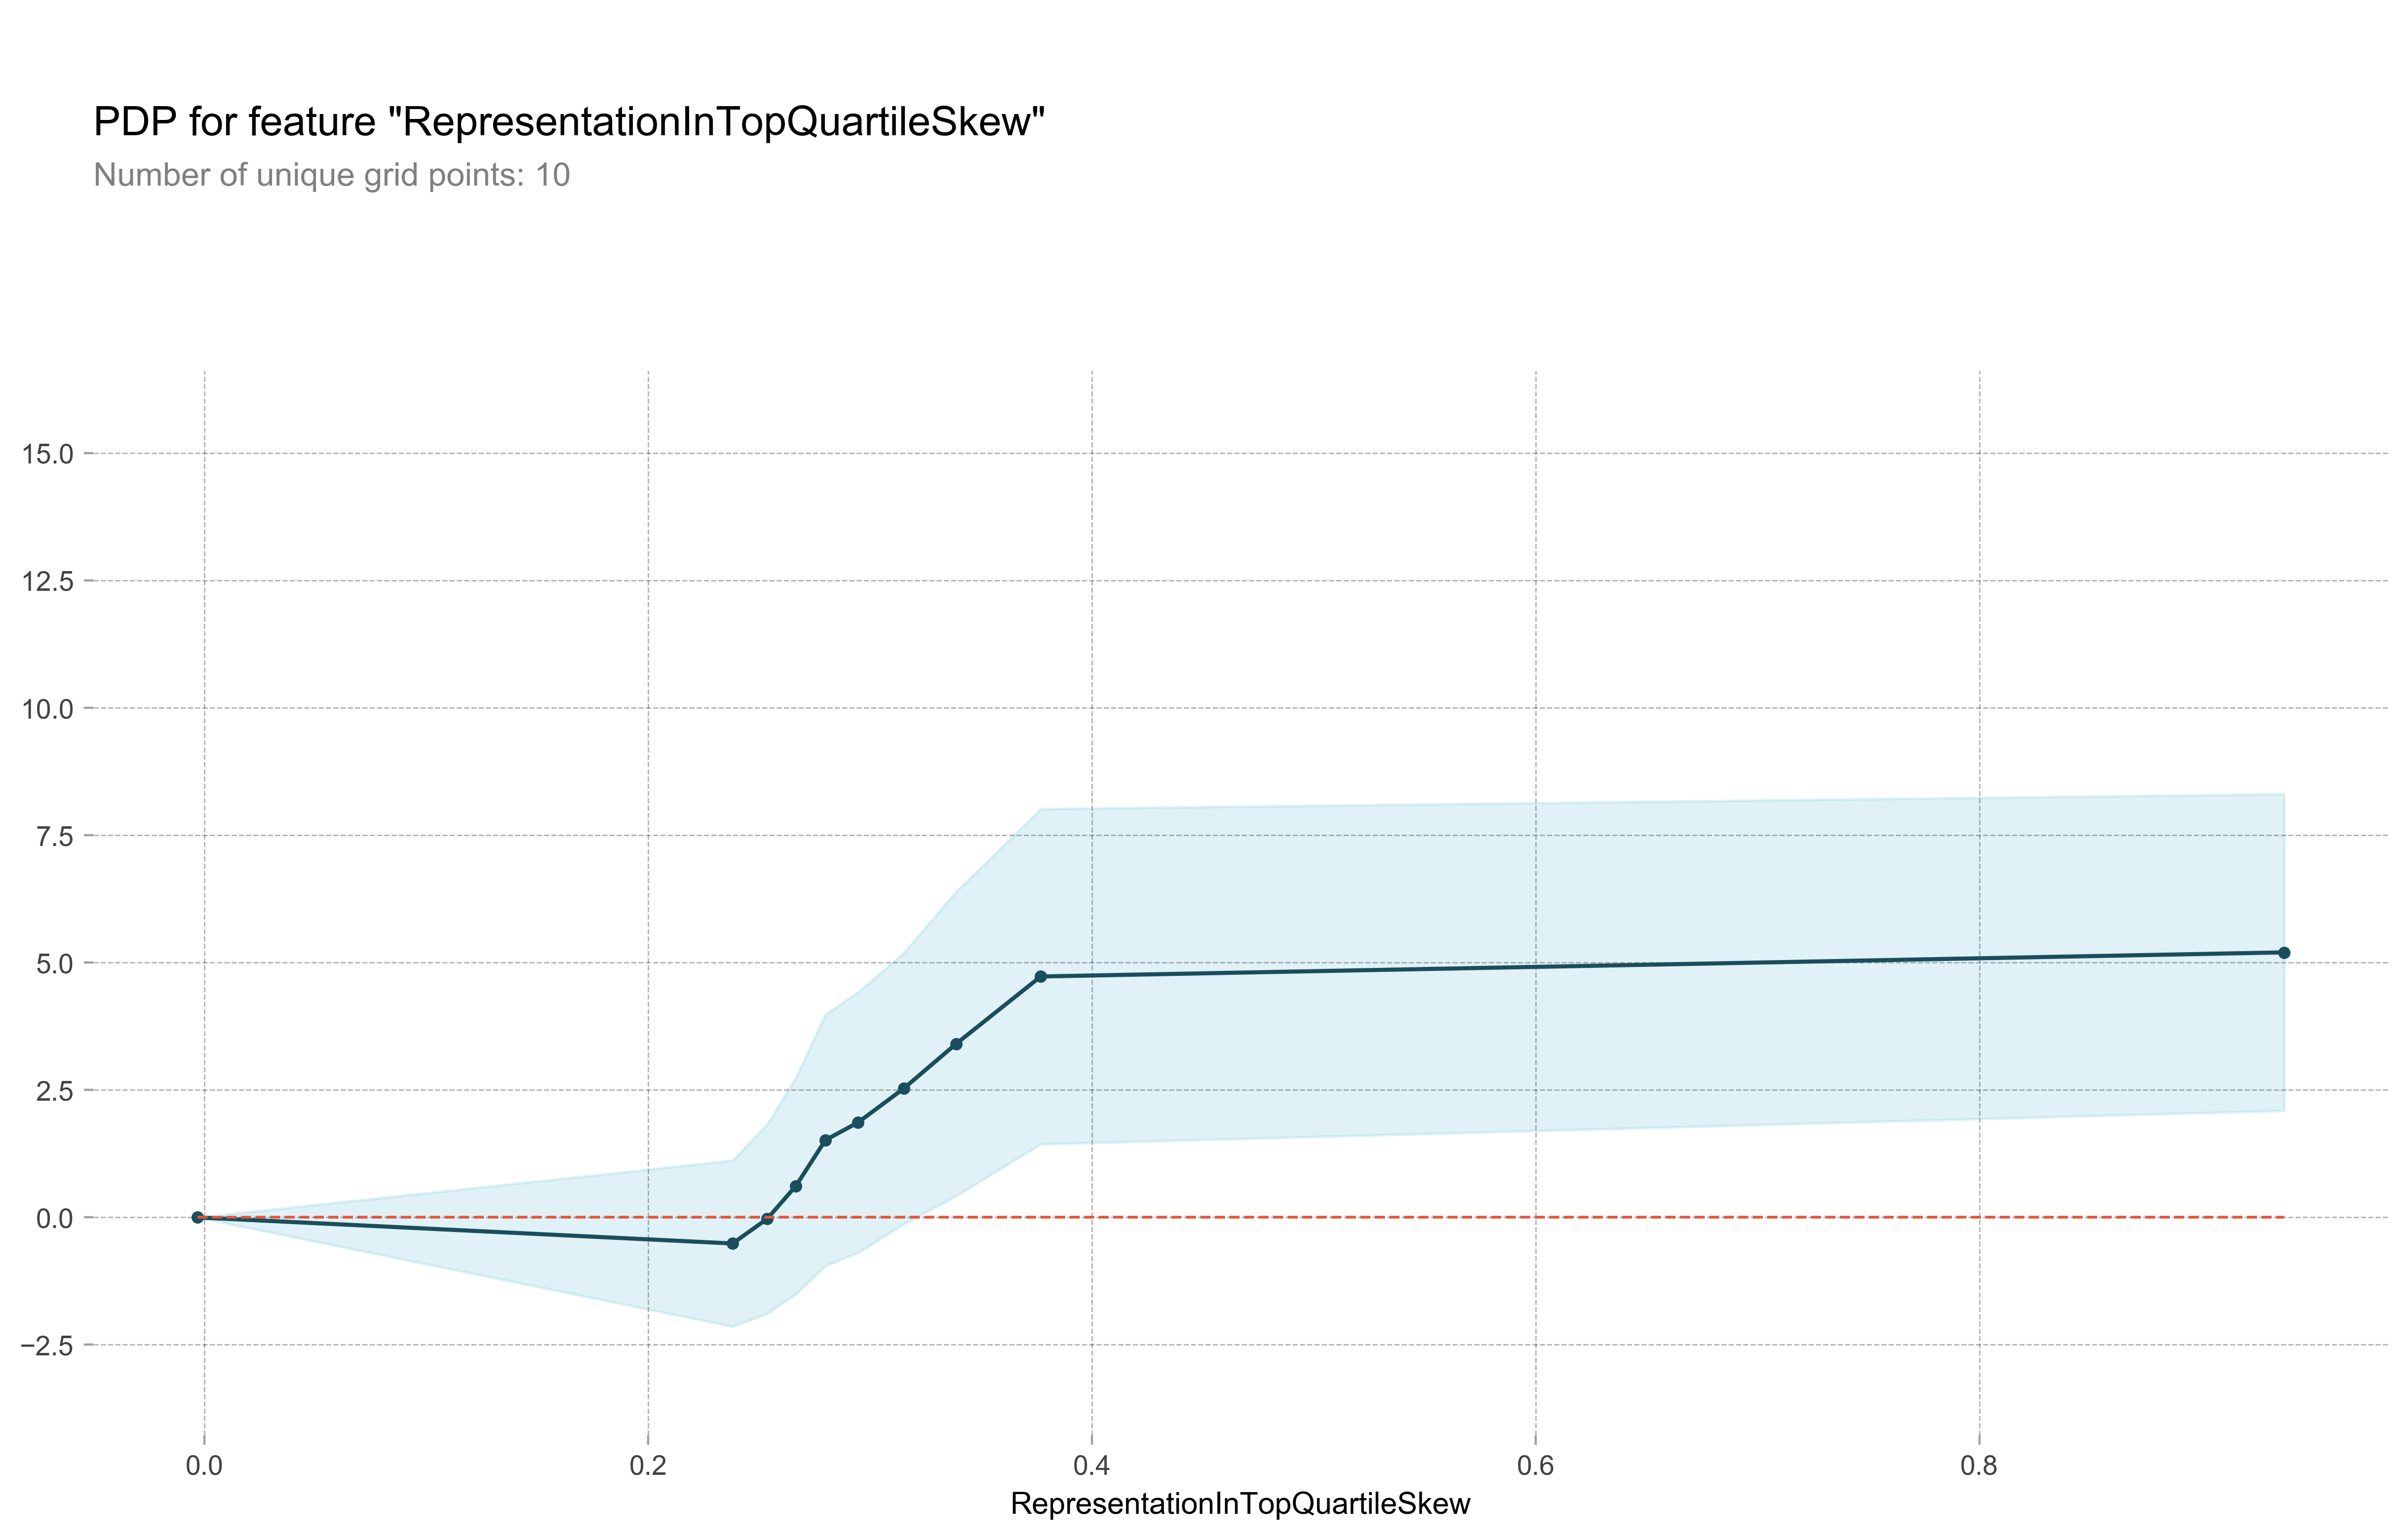

In [61]:
pdpFunction(rf_model4,val_X,features,'RepresentationInTopQuartileSkew')

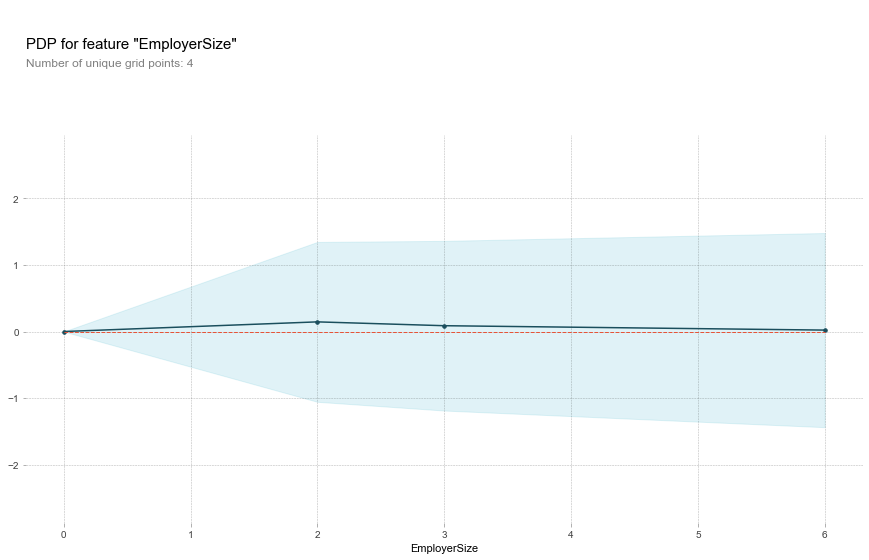

<Figure size 432x288 with 0 Axes>

In [75]:
pdpFunction(median_forest_model,val_X,features,'EmployerSize')

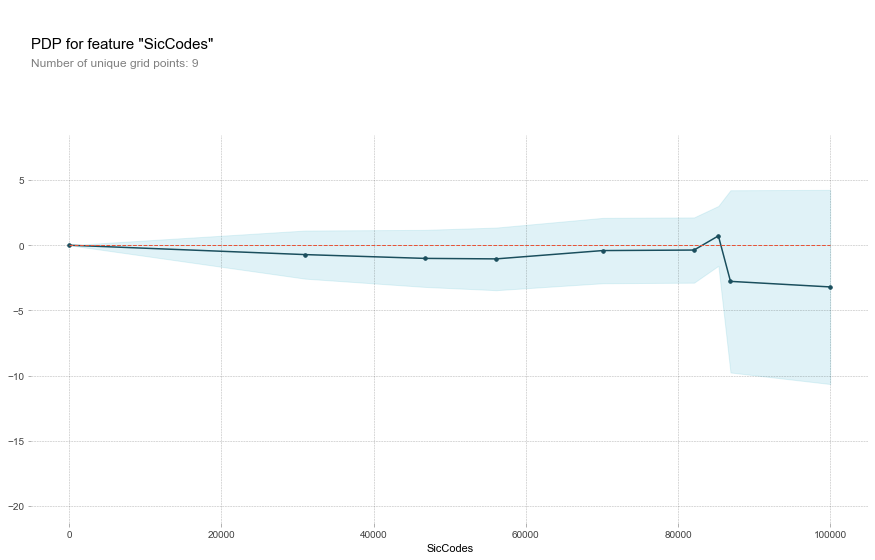

In [65]:
pdpFunction(median_forest_model,val_X,features,'SicCodes')

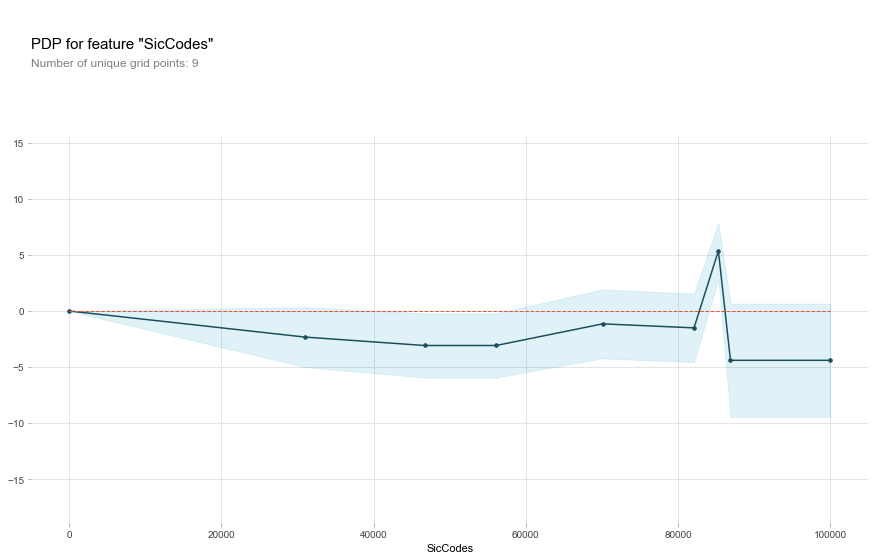

In [66]:
pdpFunction(median_gradboost_model,val_X,features,'SicCodes')

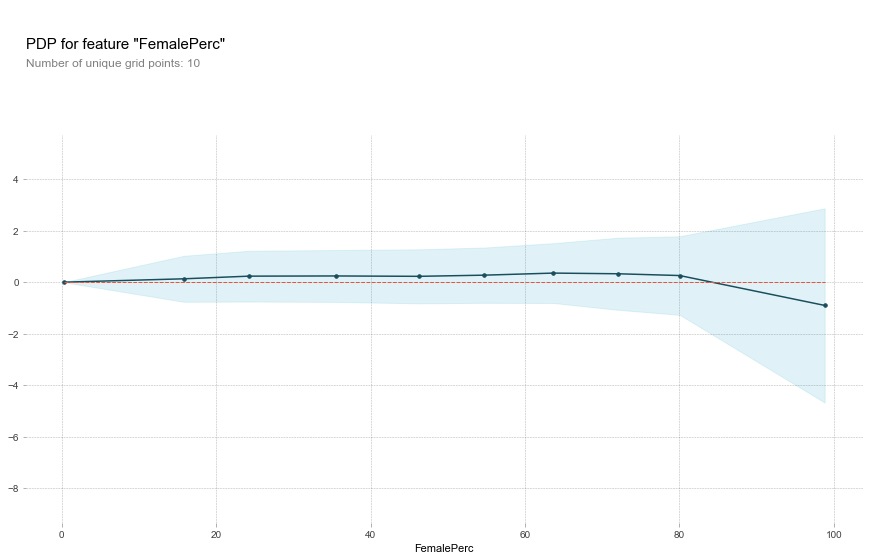

In [67]:
pdpFunction(median_forest_model,val_X,features,'FemalePerc')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


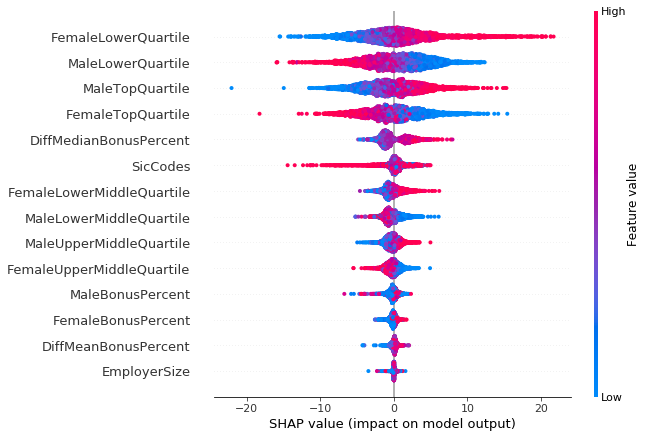

In [63]:
# https://github.com/slundberg/shap
# this takes time
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(median_forest_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)


shap.summary_plot(shap_values, val_X)

The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.


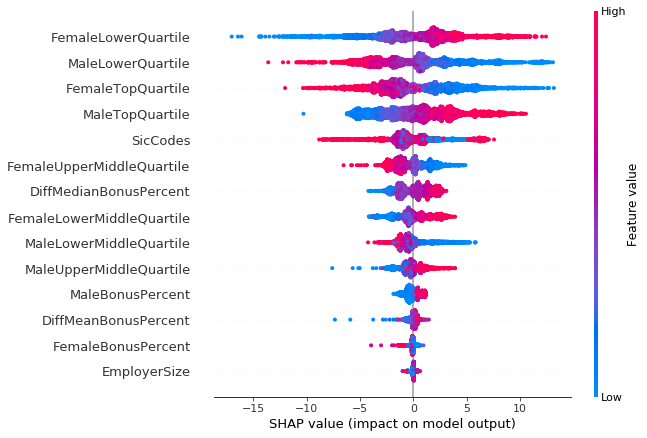

In [64]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(median_gradboost_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)


shap.summary_plot(shap_values, val_X)

In [47]:
url = 'data/gender-pay-gap-uk-gov/2019.csv.gz'
data_2019 = pd.read_csv(url, compression='gzip')
data_2019.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,1LIFE MANAGEMENT SOLUTIONS LIMITED,"Ldh House St Ives Business Park,\r\nParsons Gr...",02566586,"93110,\r\n93130,\r\n93290",11.0,-0.5,81.5,94.2,10.0,11.4,...,57.7,44.2,55.8,https://www.1life.co.uk/gender-pay-gap,Mark Braithwaite (Managing Director),250 to 499,1LIFE MANAGEMENT SOLUTIONS LIMITED,False,05/04/2020 00:00:00,10/03/2020 17:03:17
1,1ST CHOICE STAFF RECRUITMENT LIMITED,"1ST CHOICE RECRUITMENT,\r\n8 St. Loyes Street,...",07972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,37.1,50.0,50.0,https://www.1stchoice.net/gender-pay-gap-repor...,Gill Knight (MD),250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,05/04/2020 00:00:00,24/01/2020 09:37:01
2,1ST HOME CARE LTD.,"14b Dickson Street,\r\nElgin Industrial Estate...",SC272838,"86900,\r\n88100",-2.0,0.5,NaN,NaN,0.0,0.0,...,91.0,9.0,91.0,https://reallifeoptions.org/,Ian Hardcastle (Chief Operating Officer),250 to 499,1ST HOME CARE LTD.,False,05/04/2020 00:00:00,12/03/2020 08:21:06
3,23.5 DEGREES LIMITED,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",08014079,56103,10.0,0.0,79.0,35.0,4.0,2.0,...,70.0,31.0,69.0,https://www.23-5degrees.com/gender-pay-gap,Luca Contardo (CFO),500 to 999,23.5 DEGREES LIMITED,False,05/04/2020 00:00:00,11/11/2019 15:33:45
4,A. & B. GLASS COMPANY LIMITED,"Addison Road,\r\nChilton Industrial Estate,\r\...",01543721,43342,19.0,4.0,42.0,45.0,70.0,41.0,...,24.0,90.0,10.0,NaN,PHILIP FARNELL (GROUP HR MANAGER),250 to 499,A. & B. GLASS COMPANY LIMITED,False,05/04/2020 00:00:00,20/05/2019 16:34:42


In [48]:
data_2019.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,2398.000000,2398.000000,1615.000000,1615.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,12.744621,11.801209,22.160372,5.574675,31.761259,30.790325,43.122560,56.877440,46.696163,53.303837,50.847873,49.152127,56.245246,43.754754
std,13.719403,16.015044,119.661055,133.940832,37.197456,36.811082,24.489993,24.489993,26.095617,26.095617,25.949462,25.949462,24.236754,24.236754
min,-75.000000,-134.000000,-3631.000000,-2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,0.000000
25%,4.000000,0.900000,7.100000,0.000000,0.000000,0.000000,23.300000,39.000000,26.000000,32.300000,30.300000,27.000000,37.000000,23.000000
50%,12.200000,9.000000,33.200000,19.000000,9.900000,9.000000,40.000000,60.000000,43.000000,57.000000,47.600000,52.400000,55.000000,45.000000
75%,21.000000,20.775000,57.500000,45.750000,71.000000,67.925000,61.000000,76.700000,67.700000,74.000000,73.000000,69.700000,77.000000,63.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,98.900000


In [49]:
def clean_up(data):
    del_cols = ["ResponsiblePerson","SubmittedAfterTheDeadline","DueDate","DateSubmitted"]
    data.drop(del_cols, axis=1, inplace=True)
    data.drop_duplicates(inplace=True)
    data.dropna(axis=0)
    return data
def feature_engineering(data):
    data['MalePercent'] = (data['MaleLowerQuartile'] +
                     data['MaleLowerMiddleQuartile'] + data['MaleUpperMiddleQuartile'] +
                     data['MaleTopQuartile']) *.25
    data['FemalePercent'] = (data['FemaleLowerQuartile'] + data['FemaleLowerMiddleQuartile'] +
                           data['FemaleUpperMiddleQuartile'] + data['FemaleTopQuartile']
                           )*.25
    data['WorkforceGenderSkew'] = data['MalePercent'] - data['FemalePercent']

    data['PercMaleWorkforceInTopQuartile'] =  data['MaleTopQuartile'] / data['MalePercent'] * .25
    data['PercMaleWorkforceInUpperMiddleQuartile'] =  data['MaleUpperMiddleQuartile'] / data['MalePercent'] * .25
    data['PercMaleWorkforceInLowerMiddleQuartile'] =  data['MaleLowerMiddleQuartile'] / data['MalePercent'] * .25
    data['PercMaleWorkforceInLowerQuartile'] =  data['MaleLowerQuartile'] / data['MalePercent'] * .25

    data['PercFemaleWorkforceInTopQuartile'] =  data['FemaleTopQuartile'] /data['FemalePercent']/100 * .25
    data['PercFemaleWorkforceInUpperMiddleQuartile'] =  data['FemaleUpperMiddleQuartile'] / data['FemalePercent'] * .25
    data['PercFemaleWorkforceInLowerMiddleQuartile'] =  data['FemaleLowerMiddleQuartile'] / data['FemalePercent'] * .25
    data['PercFemaleWorkforceInLowerQuartile'] =  data['FemaleLowerQuartile'] / data['FemalePercent'] * .25

    data['RepresentationInTopQuartileSkew'] = data['PercMaleWorkforceInTopQuartile'] - data['PercFemaleWorkforceInTopQuartile']
    data['RepresentationInUpperMiddleQuartileSkew'] = data['PercMaleWorkforceInUpperMiddleQuartile'] - data['PercFemaleWorkforceInUpperMiddleQuartile']
    data['RepresentationInLowerMiddleQuartileSkew'] = data['PercMaleWorkforceInLowerMiddleQuartile'] - data['PercFemaleWorkforceInLowerMiddleQuartile']
    data['RepresentationInLowerQuartileSkew'] = data['PercMaleWorkforceInLowerQuartile'] - data['PercFemaleWorkforceInLowerQuartile']

    data['BonusGenderSkew'] = data['MaleBonusPercent'] - data['FemaleBonusPercent']
    data = sic_desc(data,siccode)
    data['EmployerSize'] = data['EmployerSize'].astype('category')
    data['EmployerSize'] = data['EmployerSize'].cat.codes
    return data

In [50]:
data_2019 = clean_up(data_2019)

In [51]:
data_2019 = feature_engineering(data_2019)

/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
data_2019.describe()

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,...,PercFemaleWorkforceInTopQuartile,PercFemaleWorkforceInUpperMiddleQuartile,PercFemaleWorkforceInLowerMiddleQuartile,PercFemaleWorkforceInLowerQuartile,RepresentationInTopQuartileSkew,RepresentationInUpperMiddleQuartileSkew,RepresentationInLowerMiddleQuartileSkew,RepresentationInLowerQuartileSkew,BonusGenderSkew,SIC Code
count,3543.000000,3543.000000,3543.000000,2258.000000,2257.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,...,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3076.000000
mean,58560.845047,12.840644,12.513576,24.715678,9.809836,28.796133,27.640898,41.880102,58.119898,45.452526,...,0.002122,0.232597,0.259097,0.296073,0.299655,0.024598,-0.030422,-0.083721,1.155236,67451.432705
std,31281.271250,13.361825,16.160698,104.946432,114.297885,36.246425,35.681197,24.503215,24.503215,26.093498,...,0.000698,0.056326,0.058864,0.091008,0.068835,0.091255,0.098138,0.131105,10.039453,22962.063696
min,1.000000,-75.000000,-134.000000,-3631.000000,-2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.032919,-0.666667,-0.650351,-0.775324,-77.200000,1130.000000
25%,38320.000000,4.500000,1.300000,7.325000,0.000000,0.000000,0.000000,21.700000,40.150000,24.550000,...,0.001821,0.217165,0.241935,0.251957,0.257042,-0.028475,-0.085126,-0.156686,-0.300000,47750.000000
50%,70100.000000,12.300000,9.900000,33.200000,20.000000,6.200000,4.900000,38.700000,61.300000,41.000000,...,0.002170,0.241725,0.261438,0.278027,0.285292,0.023275,-0.033051,-0.082305,0.000000,80100.000000
75%,85310.000000,21.100000,21.700000,58.100000,44.800000,64.100000,58.000000,59.850000,78.300000,66.000000,...,0.002406,0.259909,0.281734,0.317317,0.333586,0.075484,0.020953,-0.006010,2.000000,85310.000000
max,99999.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.010000,0.666667,0.826374,0.976285,0.926318,0.551874,0.689525,0.474662,100.000000,99999.000000


In [53]:
data_2019.dropna(axis=0)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,PercFemaleWorkforceInUpperMiddleQuartile,PercFemaleWorkforceInLowerMiddleQuartile,PercFemaleWorkforceInLowerQuartile,RepresentationInTopQuartileSkew,RepresentationInUpperMiddleQuartileSkew,RepresentationInLowerMiddleQuartileSkew,RepresentationInLowerQuartileSkew,BonusGenderSkew,SIC Code,Description
0,1LIFE MANAGEMENT SOLUTIONS LIMITED,"Ldh House St Ives Business Park,\r\nParsons Gr...",02566586,93110,11.0,-0.5,81.5,94.2,10.0,11.4,...,0.251745,0.282286,0.222513,0.256348,-0.004087,-0.075612,0.064372,-1.4,93110.0,Operation of sports facilities
1,1LIFE MANAGEMENT SOLUTIONS LIMITED,"Ldh House St Ives Business Park,\r\nParsons Gr...",02566586,93130,11.0,-0.5,81.5,94.2,10.0,11.4,...,0.251745,0.282286,0.222513,0.256348,-0.004087,-0.075612,0.064372,-1.4,93130.0,Fitness facilities
2,1LIFE MANAGEMENT SOLUTIONS LIMITED,"Ldh House St Ives Business Park,\r\nParsons Gr...",02566586,93290,11.0,-0.5,81.5,94.2,10.0,11.4,...,0.251745,0.282286,0.222513,0.256348,-0.004087,-0.075612,0.064372,-1.4,93290.0,Other amusement and recreation activities n.e.c.
3,1ST CHOICE STAFF RECRUITMENT LIMITED,"1ST CHOICE RECRUITMENT,\r\n8 St. Loyes Street,...",07972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,0.220047,0.191578,0.291815,0.213110,0.051776,0.100989,-0.072282,0.7,78109.0,Other activities of employment placement agencies
6,23.5 DEGREES LIMITED,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",08014079,56103,10.0,0.0,79.0,35.0,4.0,2.0,...,0.250896,0.258065,0.243728,0.253725,-0.002962,-0.026660,0.020735,2.0,56103.0,Take-away food shops and mobile food stands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,YORKSHIRE TIGER LIMITED,"ARRIVA PLC,\r\n1 Admiral Way,\r\nDoxford Inter...",04166041,49390,-2.9,0.2,-25.5,0.0,12.7,3.8,...,0.176630,0.220109,0.307065,0.242357,0.080803,0.032920,-0.062847,8.9,49390.0,Other passenger land transport
3539,ZEBRA TECHNOLOGIES EUROPE LIMITED,"Dukes Meadow,\r\nMillboard Road,\r\nBourne End...",02881068,62012,12.4,19.1,31.1,37.7,94.3,93.1,...,0.291631,0.281277,0.283003,0.291766,-0.058614,-0.044037,-0.046466,1.2,62012.0,Business and domestic software development
3540,ZEN INTERNET LIMITED,"Sandbrook House Sandbrook Park,\r\nSandbrook W...",03101568,61100,21.9,18.7,66.0,60.0,11.7,6.6,...,0.256820,0.198495,0.412041,0.291149,-0.009289,0.070147,-0.220690,5.1,61100.0,Wired telecommunications activities
3541,ZF SERVICES UK LIMITED,"Abbeyfield Road,\r\nLenton,\r\nNottingham,\r\n...",01137722,45310,7.6,11.3,23.6,11.3,49.8,45.1,...,0.229141,0.315068,0.300125,0.272137,0.026099,-0.081412,-0.062714,4.7,45310.0,Wholesale trade of motor vehicle parts and acc...


In [54]:
y = data_2019['DiffMedianHourlyPercent']

features = ['SicCodes','MaleBonusPercent', 'FemaleBonusPercent',
               'MaleLowerQuartile','FemaleLowerQuartile', 
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize', 'BonusGenderSkew', 'WorkforceGenderSkew',
                 'RepresentationInLowerMiddleQuartileSkew',
                'RepresentationInUpperMiddleQuartileSkew', 'RepresentationInLowerQuartileSkew',
            'RepresentationInTopQuartileSkew',
                            'PercMaleWorkforceInTopQuartile','PercMaleWorkforceInUpperMiddleQuartile',
            'PercMaleWorkforceInLowerMiddleQuartile', 'PercMaleWorkforceInLowerQuartile',
                 'PercFemaleWorkforceInTopQuartile','PercFemaleWorkforceInUpperMiddleQuartile',
            'PercFemaleWorkforceInLowerMiddleQuartile', 'PercFemaleWorkforceInLowerQuartile',
           ]
X = data_2019[features]

In [55]:
preds = median_tree_model.predict(X)
error = y - preds

In [56]:
print(error[10])

1.345000000000006


In [57]:
import operator
max_idx, max_val = max(enumerate(error), key=operator.itemgetter(1))
threshold = max_val * 0.4

In [58]:
data_2019.loc[max_idx]

EmployerName                                                        T. CLASS SECURITY LIMITED
Address                                     6 Skylines Village,\r\nLimeharbour,\r\nLondon,...
CompanyNumber                                                                        03622392
SicCodes                                                                                80100
DiffMeanHourlyPercent                                                                     100
DiffMedianHourlyPercent                                                                   100
DiffMeanBonusPercent                                                                      100
DiffMedianBonusPercent                                                                    100
MaleBonusPercent                                                                          100
FemaleBonusPercent                                                                        100
MaleLowerQuartile                                           

In [59]:
data_2019['error'] = error
data_2019['predicted_gpg'] = preds

In [60]:
data_2019.loc[data_2019['error'] > threshold].sort_values('error',ascending=False)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,PercFemaleWorkforceInLowerQuartile,RepresentationInTopQuartileSkew,RepresentationInUpperMiddleQuartileSkew,RepresentationInLowerMiddleQuartileSkew,RepresentationInLowerQuartileSkew,BonusGenderSkew,SIC Code,Description,error,predicted_gpg
2885,T. CLASS SECURITY LIMITED,"6 Skylines Village,\r\nLimeharbour,\r\nLondon,...",03622392,80100,100.0,100.0,100.0,100.0,100.0,100.0,...,0.250000,0.247500,0.000000,0.000000,0.000000,0.0,80100.0,Private security activities,112.466,-12.466
997,EDUCATION FOR THE 21ST CENTURY,"The Ravensbourne School,\r\nHayes Lane,\r\nBro...",07559170,85310,24.2,59.7,NaN,NaN,0.0,0.0,...,0.198563,0.194566,-0.096791,-0.053618,0.219347,0.0,85310.0,General secondary education,68.800,-9.100
3134,THE PEGASUS ACADEMY TRUST,"Whitehorse Manor School,\r\nBrigstock Road,\r\...",07542114,85200,19.4,47.6,NaN,NaN,0.0,0.0,...,0.238764,0.201989,-0.178754,0.127681,0.102145,0.0,85200.0,Primary education,63.579,-15.979
1807,LUCECO PLC,"Building E Stafford Park 1,\r\nStafford Park,\...",05254883,70100,38.8,25.9,97.0,99.0,100.0,100.0,...,0.000000,0.215806,0.258065,0.258065,0.258065,0.0,70100.0,Activities of head offices,63.029,-37.129
2479,RUSH HAIR LIMITED,"23 George Street,\r\nCroydon,\r\nSurrey,\r\nCR...",03774837,47990,69.2,53.3,NaN,NaN,0.0,0.0,...,0.255600,0.285035,-0.003727,-0.012009,-0.030229,0.0,47990.0,"Other retail sale not in stores, stalls or mar...",52.269,1.031
2480,RUSH HAIR LIMITED,"23 George Street,\r\nCroydon,\r\nSurrey,\r\nCR...",03774837,82990,69.2,53.3,NaN,NaN,0.0,0.0,...,0.255600,0.285035,-0.003727,-0.012009,-0.030229,0.0,82990.0,Other business support service activities n.e.c.,51.853,1.447
2481,RUSH HAIR LIMITED,"23 George Street,\r\nCroydon,\r\nSurrey,\r\nCR...",03774837,96020,69.2,53.3,NaN,NaN,0.0,0.0,...,0.255600,0.285035,-0.003727,-0.012009,-0.030229,0.0,96020.0,Hairdressing and other beauty treatment,51.589,1.711
2232,PARTNERING HEALTH LIMITED,"Ailsa House, 3 Turnberry House The Links, 4400...",06563486,86210,23.7,64.8,75.0,0.0,27.0,18.6,...,0.270058,0.294900,0.093588,-0.120776,-0.050715,8.4,86210.0,General medical practice activities,51.464,13.336
2534,SCRIVENS LIMITED,"SCRIVENS HOUSE,\r\n60 Islington Row Middleway,...",00377588,47741,25.3,30.0,58.3,6.2,56.2,59.0,...,0.196078,0.156797,-0.132110,0.020859,0.229453,-2.8,47741.0,Retail sale of hearing aids,49.450,-19.450
2535,SCRIVENS LIMITED,"SCRIVENS HOUSE,\r\n60 Islington Row Middleway,...",00377588,47782,25.3,30.0,58.3,6.2,56.2,59.0,...,0.196078,0.156797,-0.132110,0.020859,0.229453,-2.8,47782.0,Retail sale by opticians,49.450,-19.450


In [65]:
data_2019.loc[2232]

EmployerName                                                        PARTNERING HEALTH LIMITED
Address                                     Ailsa House, 3 Turnberry House The Links, 4400...
CompanyNumber                                                                        06563486
SicCodes                                                                                86210
DiffMeanHourlyPercent                                                                    23.7
DiffMedianHourlyPercent                                                                  64.8
DiffMeanBonusPercent                                                                       75
DiffMedianBonusPercent                                                                      0
MaleBonusPercent                                                                           27
FemaleBonusPercent                                                                       18.6
MaleLowerQuartile                                           